# Tweet extraction

In this part we extract the tweets for the [3], [11], and [12] in the report and form JSON files.

To run this code you need an API key from twitter. You have to create file *twitter_api.txt* in the *code* folder of the repository. Then fill out the following JSON and paste it into the *twitter_api.txt*:
```
{"key": "your-key-here",
"secret-key": "your-secret-key-here",
"bearer-token": "your-bearer-token-here",
"access-token": "your-access-token-here",
"access-token-secret": "your-access-token-secret-here"}
```

You also need to create a folder named *filtered* in the data folder of this repository.

In [1]:
def custom_tweet( tweet_id, tweet_text, entities, label):
    new_d = dict()
    new_d["id"] = tweet_id
    new_d["text"] = tweet_text
    new_d["entities"] = entities
    new_d["label"] = label
    return new_d


In [2]:
import tweepy
import pandas as pd
import numpy as np
import json
import time
from tqdm.notebook import tqdm

In [3]:
with open('twitter_api.txt') as f:
     data = json.load(f)

In [4]:
# initialize tweepy
consumer_key = data["key"]
consumer_secret = data["secret-key"]

access_token = data["access-token"]
access_token_secret = data["access-token-secret"]

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
# reads df
df = pd.read_csv("data/filtered/racism_sexism_benevolent.csv", header = None)
df.head()

,0,1
0,572342978255048705,racism
1,572341498827522049,racism
2,572340476503724032,racism
3,572334712804384768,racism
4,572332655397629952,racism


In [6]:
labels = dict(zip(df[0].to_numpy().astype(str), df[1]))

In [7]:
ids_to_request = df[0].to_numpy().tolist()

Before running the code you need to create *init.txt* in the *code* folder of this repository. The file must contain a single line with integer *0*, no spaces or any other signs.

In [10]:
# read starting point
with open('init.txt', 'r') as fp:
    start = fp.read()
fp.close() 
start = int(start)
print(start)

0


Before running the code make sure you have the following directories: *data/filtered/racism_sexism_benevolent/*

In [11]:
for i in tqdm(range(start, int(len(ids_to_request)/100))):
    # get tweets
    tweets = api.statuses_lookup(ids_to_request[i*100:(i+1)*100])
    
    # get dict
    custom_tweets = dict()
    for tweet in tweets:
        custom = custom_tweet(tweet.id_str, tweet.text, tweet.entities, labels[tweet.id_str])
        custom_tweets[tweet.id_str] = custom
    
    # save them
    if len(tweets) > 0:
        f = open(f'data/filtered/racism_sexism_benevolent/{i:03d}.json', "w")
        json.dump(custom_tweets, f)
        f.close()
    
    # update init
    f = open('init.txt', 'w')
    f.write(str(i+1))
    f.close()
    
    

  0%|          | 0/139 [00:00<?, ?it/s]

In [12]:
int(len(ids_to_request)/100)

139

# Merging files

The previous code generated a lot of smaller files as the extraction extracts tweets in bathes. This part merge files into one.

In [3]:
import os
import json

In [3]:
all_tweets = dict()

for fn in os.listdir("data/filtered/racism_sexism_benevolent/"):
    f = open(f"data/filtered/racism_sexism_benevolent/{fn}", "r")
    data = json.load(f)
    all_tweets = {**all_tweets, **data}
    
# dump merged
f = open(f'data/filtered/racism_sexism_benevolent.json', "w")
json.dump(all_tweets, f)
f.close()

# Distribution of the tweets

In [15]:
counter = [0] * 4   # racism, sexism, both, benevolent_sexism

In [16]:
for v in list(all_tweets.values()):
    label = v["label"]
    if label == "racism":
        counter[0] = counter[0] + 1
    elif label == "sexism":
        counter[1] = counter[1] + 1
    elif label == "both":
        counter[2] = counter[2] + 1
    elif label == "benevolent":
        counter[3] = counter[3] + 1

        
counter

[130, 3535, 18, 2339]

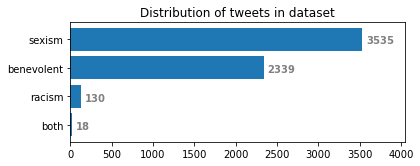

In [17]:
import matplotlib.pyplot as plt
import numpy as np

counter = np.array(counter)

idx = np.argsort(counter)

x = np.array(["racism", "sexism", "both", "benevolent"])[idx]
y = counter[idx]

fig, ax = plt.subplots(figsize = (6,2.2))
ax.barh(x,y)
ax.set_xlim([0, 4050])
for i, v in enumerate(y):
    ax.text(v + 50, i - 0.15, str(v), color="gray", fontweight='bold')
plt.title("Distribution of tweets in dataset")
plt.show()

# Tweet examples

In [20]:
i = 0
target = "racism"
for id, tweet in all_tweets.items():
    if tweet["label"] == target:
        print(tweet["text"])
        i = i + 1
        
    if i > 20:
        break

These girls are the equivalent of the irritating Asian girls a couple years ago. Well done, 7. #MKR
Drasko they didn't cook half a bird you idiot #mkr
Hopefully someone cooks Drasko in the next ep of #MKR
of course you were born in serbia...you're as fucked as A Serbian Film #MKR
So Drasko just said he was impressed the girls cooked half a chicken.. They cooked a whole one  #MKR
"He can't be a server at our restaurant, that beard makes him look like a terrorist." Everyone laughs. #fuckthanksgiving
@MisfitInChains @oldgfatherclock @venereveritas13 SANTA JUST *IS* WHITE
@GarrettaBrown85 @5Candrew Why do people even talk about white privilege when the majority of food stamp recipients are white people!!
RT @harikondabolu: In his #Ferguson testimony, Darren Wilson said he thought "it looks like a demon" before he shot Mike Brown. Ironic word…
RT @AntonioFrench: I spent the morning at the Board of Elections getting maps/data to start registering every black person in #Ferguson. ht…
RT @Drea

In [23]:
i = 0
target = "sexism"
for id, tweet in all_tweets.items():
    if tweet["label"] == target:
        print(tweet["text"])
        i = i + 1
        
    if i > 30:
        break

I've had better looking shits than these two! #MKR2015 #MKR #killerblondes
The face of very ugly promo girls ! Faces like cats arsehole #mkr excited to see them@go down tonight...literally http://t.co/HgoJrfoIeO
@mykitchenrules Elegant and beautiful?Cheap and trashy!Nothing more unattractive than girls banging on about how hot hey are. #mkr #notsassy
Stop saying dumb blondes with pretty faces as you need a pretty face to pull that off!!!! #mkr
#mkr Omg there restaurant looks like a a little girls room oh my! Gosh
Drasko only likes his mum's hot pot, especially when she's drunk and unconscious #MKR
its melting because you didnt put it in the freezer before you served it you dumb skank! #MKR
@mykitchenrules Girls, please don't let the leftovers go to waist. My dog would really appreciate it! #MKR
Sorry #killerblondes but you are a long LONG way from refined. #mkr
I think they're deconstraucted Pro . . . mowhores #MKR
#mkr deconstructed by girls that have deconstructed brains  ! Nearly br

In [5]:
i = 0
target = "benevolent"
for id, tweet in all_tweets.items():
    if tweet["label"] == target:
        print(tweet["text"])
        i = i + 1
        
    if i > 60:
        break

RT @GemmaAnneStyles: Happy #womensday to all my sassy women, classy women, nasty women 💋👧🏾💖👩🏼‍🔬👄👵🏼 my fine women, alive women, gonna fight…
RT @antonioguterres: We can’t achieve any of our goals without the participation of women and girls. #WomensDay https://t.co/2oCVEQQFMR
RT @GemmaAnneStyles: Happy #womensday to all my sassy women, classy women, nasty women 💋👧🏾💖👩🏼‍🔬👄👵🏼 my fine women, alive women, gonna fight…
RT @XavierSociety: Our library has many books on our Holy Mother. Imagine how different the world would be w/o her. #ADayWithoutWomen #Inte…
#women are a #force #internationalwomensday #adaywithoutwomen #womensmarch #equality #EqualityMatters… https://t.co/Dc6oixVXEu
RT @GemmaAnneStyles: Happy #womensday to all my sassy women, classy women, nasty women 💋👧🏾💖👩🏼‍🔬👄👵🏼 my fine women, alive women, gonna fight…
RT @SriSri: Women possess a unique combination of will,determination &amp; emotions.They can protect,support &amp; uplift the family &amp; society.Happ…
RT @mikandynothem: My w